# Logistic Regression

逻辑回归(Logistic Regression, LR)模型其实仅在线性回归的基础上，套用了一个逻辑函数，但也就由于这个逻辑函数，使得逻辑回归模型成为了机器学习领域一颗耀眼的明星，更是计算广告学的核心。本节主要详述逻辑回归模型的基础。


## 1 逻辑回归模型
回归是一种比较容易理解的模型，就相当于$y=f(x)$，表明自变量$x$与因变量$y$的关系。最常见问题有如医生治病时的望、闻、问、切，之后判定病人是否生病或生了什么病，其中的望闻问切就是获取自变量$x$，即特征数据，判断是否生病就相当于获取因变量$y$，即预测分类。

最简单的回归是线性回归，在此借用Andrew NG的讲义，有如图所示，$X$为数据点——肿瘤的大小，$Y$为观测值——是否是恶性肿瘤。通过构建线性回归模型，如$h_\theta(x)$所示，构建线性回归模型后，即可以根据肿瘤大小，预测是否为恶性肿瘤$h_\theta(x)) \ge 0.5$为恶性，$h_\theta(x) \lt 0.5$为良性。

![LinearRegression](images/fig1.gif)

然而线性回归的鲁棒性很差，例如在上图的数据集上建立回归，因最右边噪点的存在，使回归模型在训练集上表现都很差。这主要是由于线性回归在整个实数域内敏感度一致，而分类范围，需要在$[0,1]$。

逻辑回归就是一种减小预测范围，将预测值限定为$[0,1]$间的一种回归模型，其回归方程与回归曲线如图2所示。逻辑曲线在$z=0$时，十分敏感，在$z>>0$或$z<<0$处，都不敏感，将预测值限定为$(0,1)$。



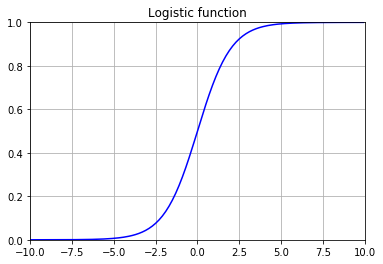

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.axis([-10,10,0,1])
plt.grid(True)
X=np.arange(-10,10,0.1)
y=1/(1+np.e**(-X))
plt.plot(X,y,'b-')
plt.title("Logistic function")
plt.show()

### 逻辑回归表达式

这个函数称为Logistic函数(logistic function)，也称为Sigmoid函数(sigmoid function)。函数公式如下：

$$
g(z) = \frac{1}{1+e^{-z}}
$$

Logistic函数当z趋近于无穷大时，g(z)趋近于1；当z趋近于无穷小时，g(z)趋近于0。Logistic函数的图形如上图所示。Logistic函数求导时有一个特性，这个特性将在下面的推导中用到，这个特性为：
$$
g'(z) =  \frac{d}{dz} \frac{1}{1+e^{-z}} \\
      =  \frac{1}{(1+e^{-z})^2}(e^{-z}) \\
      =  \frac{1}{(1+e^{-z})} (1 - \frac{1}{(1+e^{-z})}) \\
      =  g(z)(1-g(z))
$$



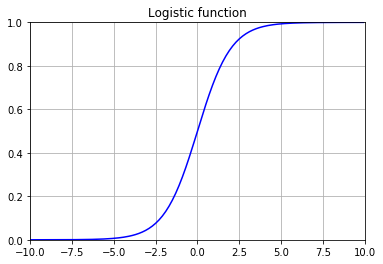

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.axis([-10,10,0,1])
plt.grid(True)
X=np.arange(-10,10,0.1)
y=1/(1+np.e**(-X))
plt.plot(X,y,'b-')
plt.title("Logistic function")
plt.show()

逻辑回归本质上是线性回归，只是在特征到结果的映射中加入了一层函数映射，即先把特征线性求和，然后使用函数$g(z)$将最为假设函数来预测。$g(z)$可以将连续值映射到0到1之间。线性回归模型的表达式带入$g(z)$，就得到逻辑回归的表达式:

$$
h_\theta(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^T x}}
$$

### 逻辑回归的软分类

现在我们将y的取值$h_\theta(x)$通过Logistic函数归一化到(0,1)间，$y$的取值有特殊的含义，它表示结果取1的概率，因此对于输入$x$分类结果为类别1和类别0的概率分别为：

$$
P(y=1|x,\theta) = h_\theta(x) \\
P(y=0|x,\theta) = 1 - h_\theta(x)
$$

对上面的表达式合并一下就是：

$$
p(y|x,\theta) = (h_\theta(x))^y (1 - h_\theta(x))^{1-y}
$$



### 梯度上升

得到了逻辑回归的表达式，下一步跟线性回归类似，构建似然函数，然后最大似然估计，最终推导出$\theta$的迭代更新表达式。只不过这里用的不是梯度下降，而是梯度上升，因为这里是最大化似然函数。

我们假设训练样本相互独立，那么似然函数表达式为：
![Loss](images/eq_loss.png)

同样对似然函数取log，转换为：
![LogLoss](images/eq_logloss.png)

转换后的似然函数对$\theta$求偏导，在这里我们以只有一个训练样本的情况为例：
![LogLossDiff](images/eq_logloss_diff.png)

这个求偏导过程中：
* 第一步是对$\theta$偏导的转化，依据偏导公式：$y=lnx$, $y'=1/x$。
* 第二步是根据g(z)求导的特性g'(z) = g(z)(1 - g(z)) 。
* 第三步就是普通的变换。

这样我们就得到了梯度上升每次迭代的更新方向，那么$\theta$的迭代表达式为：
$$
\theta_j := \theta_j + \alpha(y^i - h_\theta(x^i)) x_j^i
$$



## Program

In [1]:
%matplotlib inline

from __future__ import division
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

np.random.seed(0)


data  =  [[ 0.694565    0.42666408]
 [ 1.68353008 -0.80016643]
 [-0.25046823  0.24392224]
 [-1.13337973 -0.6112787 ]
 [ 1.76905577 -0.31025439]
 [ 2.00225511 -0.18592   ]
 [ 0.91169861  0.46995543]
 [ 0.88211794 -0.46701178]
 [ 0.75006972  0.33995342]
 [ 1.30208867 -0.72334923]]
label =  [0 1 1 0 1 1 0 1 0 1]


Text(0.5, 1.0, 'Original Data')

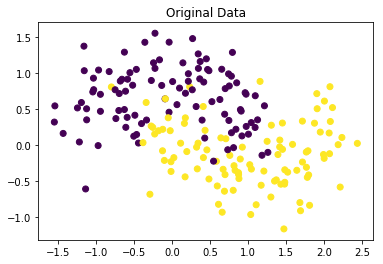

In [2]:
# load sample data
data, label = sklearn.datasets.make_moons(200, noise=0.30)

print("data  = ", data[:10, :])
print("label = ", label[:10])

plt.scatter(data[:,0], data[:,1], c=label)
plt.title("Original Data")

In [3]:
def plot_decision_boundary(predict_func, data, label):
    """画出结果图
    Args:
        pred_func (callable): 预测函数
        data (numpy.ndarray): 训练数据集合
        label (numpy.ndarray): 训练数据标签
    """
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = predict_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.Spectral)
    plt.show()



In [4]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

class Logistic(object):
    """logistic回归模型"""
    def __init__(self, data, label):
        self.data = data
        self.label = label

        self.data_num, n = np.shape(data)
        self.weights = np.ones(n)
        self.b = 1

    def train(self, num_iteration=150):
        """随机梯度上升算法
        Args:
            data (numpy.ndarray): 训练数据集
            labels (numpy.ndarray): 训练标签
            num_iteration (int): 迭代次数
        """
        for j in range(num_iteration):
            data_index = list(range(self.data_num))
            for i in range(self.data_num):
                # 学习速率
                alpha = 0.01
                rand_index = int(np.random.uniform(0, len(data_index)))
                error = self.label[rand_index] - sigmoid(sum(self.data[rand_index] * self.weights + self.b))
                self.weights += alpha * error * self.data[rand_index]
                self.b += alpha * error
                del(data_index[rand_index])

    def predict(self, predict_data):
        """预测函数"""
        result = list(map(lambda x: 1 if sum(self.weights * x + self.b) > 0 else 0,
                     predict_data))
        return np.array(result)


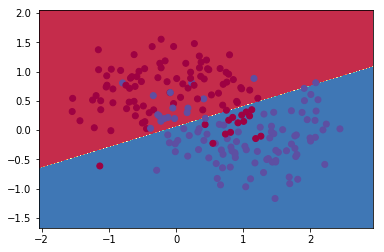

In [5]:
logistic = Logistic(data, label)
logistic.train(200)
plot_decision_boundary(lambda x: logistic.predict(x), data, label)

## How to use sklearn to resolve the problem


accuracy train = 0.825000
accuracy test = 0.900000


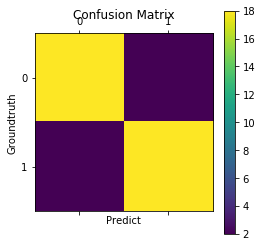

In [16]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# calculate train/test data number
N = len(data)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = data[:N_train, :]
y_train = label[:N_train]
x_test  = data[N_train:, :]
y_test  = label[N_train:]

# do logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

# calculate train/test accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("accuracy train = %f" % acc_train)
print("accuracy test = %f" % acc_test)

# plot confusion matrix
cm = confusion_matrix(y_test,pred_test)

plt.matshow(cm)
plt.title(u'Confusion Matrix')
plt.colorbar()
plt.ylabel(u'Groundtruth')
plt.xlabel(u'Predict')
plt.show()

## Multi-class recognition

### Load & show the data

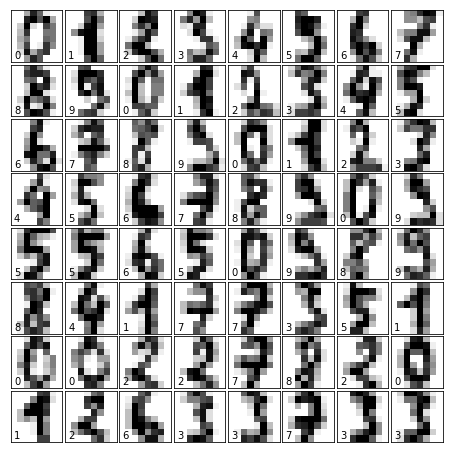

In [15]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

# load data
digits = load_digits()

# copied from notebook 02_sklearn_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Visualizing the Data

A good first-step for many problems is to visualize the data using one of the Dimensionality Reduction techniques we saw earlier. We'll start with the most straightforward one, Principal Component Analysis (PCA).

PCA seeks orthogonal linear combinations of the features which show the greatest variance, and as such, can help give you a good idea of the structure of the data set. Here we'll use RandomizedPCA, because it's faster for large N.

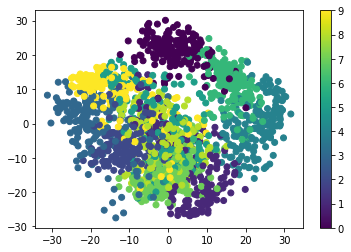

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver="randomized")
proj = pca.fit_transform(digits.data)

plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

A weakness of PCA is that it produces a linear dimensionality reduction:
this may miss some interesting relationships in the data.  If we want to
see a nonlinear mapping  of the data, we can use one of the several
methods in the `manifold` module.  Here we'll use [Isomap](https://blog.csdn.net/VictoriaW/article/details/78497316) (a concatenation
of Isometric Mapping) which is a manifold learning method based on
graph theory:

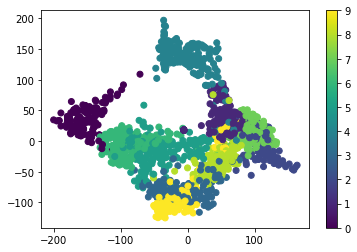

In [18]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)

plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

## Program

In [20]:
from sklearn.datasets import load_digits
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 

# load digital data
digits, dig_label = load_digits(return_X_y=True)
print(digits.shape)

# calculate train/test data number
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]

# do logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

# calculate train/test accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("accuracy train = %f, accuracy_test = %f" % (acc_train, acc_test))

score_train = lr.score(x_train, y_train)
score_test  = lr.score(x_test, y_test)
print("score_train = %f, score_test = %f" % (score_train, score_test))



(1797, 64)
accuracy train = 0.998608, accuracy_test = 0.897222
score_train = 0.998608, score_test = 0.897222


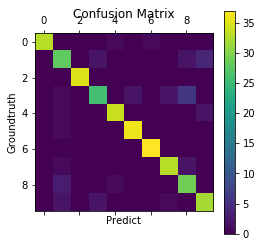

In [21]:
from sklearn.metrics import confusion_matrix

# plot confusion matrix
cm = confusion_matrix(y_test,pred_test)

plt.matshow(cm)
plt.title(u'Confusion Matrix')
plt.colorbar()
plt.ylabel(u'Groundtruth')
plt.xlabel(u'Predict')
plt.show()

## Exercise - How to draw mis-classfied data?

1. How to obtain the mis-classified index?
2. How to draw them?

## References

* [逻辑回归模型(Logistic Regression, LR)基础](https://www.cnblogs.com/sparkwen/p/3441197.html)
* [逻辑回归（Logistic Regression）](http://www.cnblogs.com/BYRans/p/4713624.html)